# Initial Package Install

In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
from pathlib import Path
import raindownloader
from raindownloader.inpeparser import INPETypes
from enum import Enum

In [29]:
raindownloader

<module 'raindownloader' from '/workspaces/INPERainDownloader/raindownloader/__init__.py'>

In [30]:
raindownloader.version

'0.1.1'

# Testing Parsers

In [31]:
from raindownloader.parser import BaseParser
from raindownloader.inpeparser import *
from raindownloader.utils import *

In [32]:
parser = INPEParsers.monthly_accum

In [33]:
parser.local_target('20230102', '../tmp')

PosixPath('../tmp/MONTHLY_ACCUM/MERGE_CPTEC_acum_jan.nc')

## Downloader

In [34]:
from raindownloader.inpedownloader import Downloader

In [35]:
downloader = Downloader(
    server= INPE.FTPurl,
    parsers=INPEParsers.parsers,
    avoid_update=True,
    post_processors=INPEParsers.post_processors
)

In [36]:
### Test Downloading all data types
# Get an arbitrary date and certify the file does not exist locally
date_str = '20220301'

for datatype in downloader.data_types:
    print(f'Testing {datatype}')
    parser = downloader.get_parser(datatype)
    target = parser.local_target(date_str, '../tmp')
    target.unlink(missing_ok=True)

    # Download the file
    file = downloader.download_file(date_str, local_folder='../tmp', datatype=datatype)
    assert file.exists()

Testing INPETypes.DAILY_RAIN
Testing INPETypes.MONTHLY_ACCUM_YEARLY
Testing INPETypes.DAILY_AVERAGE
Testing INPETypes.MONTHLY_ACCUM
Testing INPETypes.MONTHLY_ACCUM_MANUAL


In [37]:
### Testing if we skip correctly the download
date_str = '20220301'

for datatype in downloader.data_types:
    # Download the file
    file = downloader.get_file(date_str, local_folder='../tmp', datatype=datatype)
    assert file.exists()

In [38]:
file = downloader.get_file('20230301', local_folder='../tmp', datatype=INPETypes.MONTHLY_ACCUM_MANUAL)
file

PosixPath('../tmp/MONTHLY_ACCUM_MANUAL/MERGE_CPTEC_acum_mar_2023.nc')

In [ ]:
downloader.is_downloaded(date_str, local_folder='../tmp', datatype=INPETypes.MONTHLY_ACCUM)

True

In [16]:
downloader.get_file('20230301', local_folder='../tmp', datatype=INPETypes.MONTHLY_ACCUM_MANUAL)

AttributeError: type object 'GISUtil' has no attribute 'create_cube'

In [ ]:
PosixPath('/workspaces/INPERainDownloader/nbs/../tmp')

# Testing FTP util

In [12]:
from raindownloader.ftp_utils import FTPUtil

In [13]:
server = 'ftp.cptec.inpe.br'
remote_file = '/modelos/tempo/MERGE/GPM/DAILY/2023/02/MERGE_CPTEC_20230226.grib2'
local_folder = '../tests/data/'


In [15]:
ftp = FTPUtil(server+'r')
ftp

gaierror: [Errno 8] nodename nor servname provided, or not known

In [89]:
ftp.get_ftp_file_info(remote_file)

{'datetime': datetime.datetime(2023, 3, 1, 13, 39, 40, tzinfo=<DstTzInfo 'Brazil/East' -03-1 day, 21:00:00 STD>),
 'size': 490682}

# Testing the Downloader

In [121]:
from raindownloader.ftp_utils import INPEDownloader, DateProcessor

In [102]:
root = '/modelos/tempo/MERGE/GPM/DAILY/'
downloader = INPEDownloader(server, root)

In [97]:
# get one specific file
downloader.download_file('20230301', local_folder=local_folder)

Local file ../tests/data/MERGE_CPTEC_20230301.grib2 is outdated. Downloading it.


PosixPath('../tests/data/MERGE_CPTEC_20230301.grib2')

In [98]:
downloader.compare_files('20230301', local_folder)

{'datetime': datetime.datetime(2023, 3, 1, 22, 39, 36, tzinfo=<DstTzInfo 'Brazil/East' -03-1 day, 21:00:00 STD>), 'size': 378002}
{'datetime': datetime.datetime(2023, 3, 1, 22, 39, 36, tzinfo=<DstTzInfo 'Brazil/East' -03-1 day, 21:00:00 STD>), 'size': 378002}


In [101]:
downloader.files_equal('20230301', local_folder)

True

# Downloading a range


In [112]:
downloader.download_files('20230227', '20230301', local_folder)

20230227
Local file ../tests/data/MERGE_CPTEC_20230227.grib2 is outdated. Downloading it.
20230228
Local file ../tests/data/MERGE_CPTEC_20230228.grib2 is outdated. Downloading it.
20230301
file ../tests/data/MERGE_CPTEC_20230301.grib2 already exists.


[PosixPath('../tests/data/MERGE_CPTEC_20230227.grib2'),
 PosixPath('../tests/data/MERGE_CPTEC_20230228.grib2'),
 PosixPath('../tests/data/MERGE_CPTEC_20230301.grib2')]

In [113]:
downloader.download_range('20230227', '20230301', local_folder)

file ../tests/data/MERGE_CPTEC_20230227.grib2 already exists.
file ../tests/data/MERGE_CPTEC_20230228.grib2 already exists.
file ../tests/data/MERGE_CPTEC_20230301.grib2 already exists.


[PosixPath('../tests/data/MERGE_CPTEC_20230227.grib2'),
 PosixPath('../tests/data/MERGE_CPTEC_20230228.grib2'),
 PosixPath('../tests/data/MERGE_CPTEC_20230301.grib2')]

In [126]:
downloader.download_recent(local_folder, x=2)

file ../tests/data/MERGE_CPTEC_20230301.grib2 already exists.
file ../tests/data/MERGE_CPTEC_20230302.grib2 already exists.


[PosixPath('../tests/data/MERGE_CPTEC_20230301.grib2'),
 PosixPath('../tests/data/MERGE_CPTEC_20230302.grib2')]

In [128]:
downloader.download_recent(local_folder, num=1)

['Error 20230303:  550 /modelos/tempo/MERGE/GPM/DAILY/2023/03/MERGE_CPTEC_20230303.grib2: No such file or directory']

# Relatorio de Chuva

In [131]:
from pathlib import Path
import xarray as xr

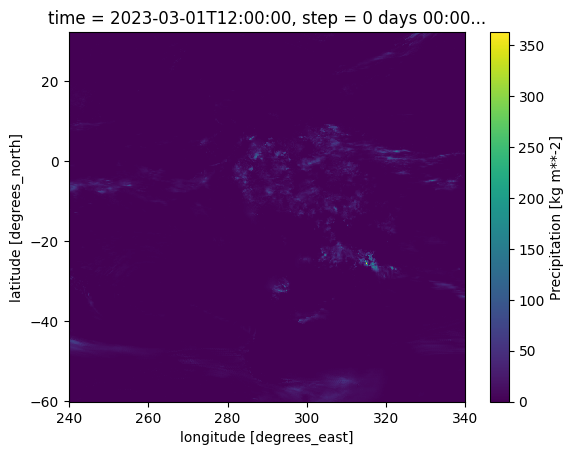

In [134]:
path = Path('../tests/data/MERGE_CPTEC_20230301.grib2')
ds = xr.open_dataset(path, engine='cfgrib')
ds['prec'].plot()

In [152]:
ds

<xarray.Dataset>
Dimensions:     (latitude: 924, longitude: 1001)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude   (longitude) float64 239.9 240.0 240.1 ... 339.8 339.9 339.9
    valid_time  datetime64[ns] ...
Data variables:
    prec        (latitude, longitude) float32 ...
    prmsl       (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             consensus
    GRIB_centreDescription:  Consensus
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Consensus
    history:                 2023-03-02T15:19 GRIB to CDM+CF via cfgrib-0.9.1...

In [153]:
ds.attrs

{'GRIB_edition': 2,
 'GRIB_centre': 'consensus',
 'GRIB_centreDescription': 'Consensus',
 'GRIB_subCentre': 0,
 'Conventions': 'CF-1.7',
 'institution': 'Consensus',
 'history': '2023-03-02T15:19 GRIB to CDM+CF via cfgrib-0.9.10.3/ecCodes-2.28.0 with {"source": "../tests/data/MERGE_CPTEC_20230301.grib2", "filter_by_keys": {}, "encode_cf": ["parameter", "time", "geography", "vertical"]}'}

In [180]:
import rasterio as rio

In [185]:
ds = ds.rio.write_crs(rio.CRS.from_epsg(4326))

In [186]:
ds.rio.crs

CRS.from_epsg(4326)

In [190]:
ds.rio.transform()

Affine(0.1, 0.0, 239.89999999999998,
       0.0, 0.09999999999999999, -60.099999999999994)

In [202]:
ds.shift(longitude=1)

<xarray.Dataset>
Dimensions:      (latitude: 924, longitude: 1001)
Coordinates:
    time         datetime64[ns] ...
    step         timedelta64[ns] ...
    surface      float64 ...
  * latitude     (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude    (longitude) float64 239.9 240.0 240.1 ... 339.8 339.9 339.9
    valid_time   datetime64[ns] ...
    spatial_ref  int64 0
Data variables:
    prec         (latitude, longitude) float32 nan 0.125 0.125 ... 0.125 0.0
    prmsl        (latitude, longitude) float32 nan nan nan nan ... nan nan nan
Attributes:
    GRIB_edition:            2
    GRIB_centre:             consensus
    GRIB_centreDescription:  Consensus
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Consensus
    history:                 2023-03-02T15:19 GRIB to CDM+CF via cfgrib-0.9.1...

In [203]:
import numpy as np
new_lon = np.mod(ds.longitude + 180, 360) - 180

In [204]:
new_lon

<xarray.DataArray 'longitude' (longitude: 1001)>
array([-120.05, -119.95, -119.85, ...,  -20.25,  -20.15,  -20.05])
Coordinates:
    time         datetime64[ns] ...
    step         timedelta64[ns] ...
    surface      float64 ...
  * longitude    (longitude) float64 239.9 240.0 240.1 ... 339.8 339.9 339.9
    valid_time   datetime64[ns] ...
    spatial_ref  int64 0

In [205]:
ds.longitude - 360

<xarray.DataArray 'longitude' (longitude: 1001)>
array([-120.05, -119.95, -119.85, ...,  -20.25,  -20.15,  -20.05])
Coordinates:
    time         datetime64[ns] ...
    step         timedelta64[ns] ...
    surface      float64 ...
  * longitude    (longitude) float64 239.9 240.0 240.1 ... 339.8 339.9 339.9
    valid_time   datetime64[ns] ...
    spatial_ref  int64 0

In [209]:
ds = ds.assign_coords(longitude=new_lon)
ds

<xarray.Dataset>
Dimensions:      (latitude: 924, longitude: 1001)
Coordinates:
    time         datetime64[ns] ...
    step         timedelta64[ns] ...
    surface      float64 ...
  * latitude     (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude    (longitude) float64 -120.1 -120.0 -119.9 ... -20.15 -20.05
    valid_time   datetime64[ns] ...
    spatial_ref  int64 0
Data variables:
    prec         (latitude, longitude) float32 ...
    prmsl        (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             consensus
    GRIB_centreDescription:  Consensus
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Consensus
    history:                 2023-03-02T15:19 GRIB to CDM+CF via cfgrib-0.9.1...

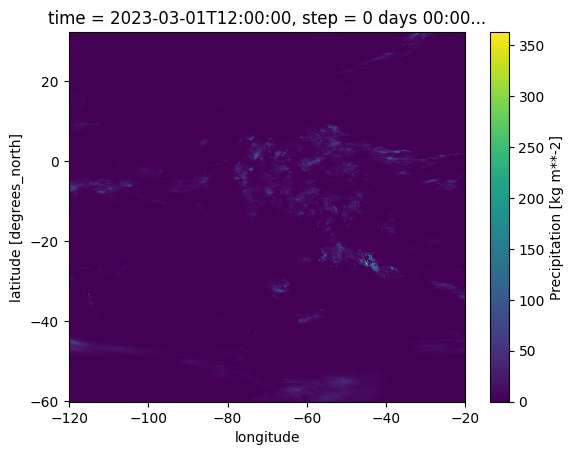

In [211]:
ds['prec'].plot()

In [213]:
ds.rio.transform()

Affine(0.10000000000000006, 0.0, -120.10000000000001,
       0.0, 0.09999999999999999, -60.099999999999994)

In [223]:
ds['prec'].rio.to_raster('../tmp/chuva.tif')

# Filter and extract a feature using geopandas

In [157]:
import geopandas as gpd
import contextily as cx

In [138]:
world_path = gpd.datasets.get_path('naturalearth_lowres')

In [139]:
world = gpd.read_file(world_path)
world.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


<Axes: >

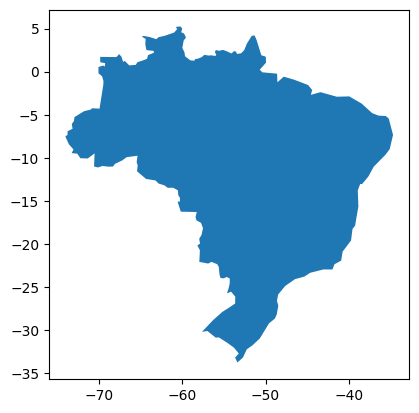

In [145]:
bra = world.query("iso_a3 == 'BRA'")
bra.plot()

In [146]:
bra

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
29,211049527.0,South America,Brazil,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."


In [150]:
bra.to_file('../tmp/bra_lowres.shp')

In [158]:
bra_wm = bra.to_crs(epsg=3857)



In [215]:
import rasterio as rio

In [216]:
chuva = rio.open('../tmp/chuva.tif')

In [217]:
chuva.read_transform()

[-120.10000000000001,
 0.10000000000000006,
 0.0,
 -60.099999999999994,
 0.0,
 0.09999999999999999]

In [218]:
chuva.bounds

BoundingBox(left=-120.10000000000001, bottom=32.3, right=-19.999999999999943, top=-60.099999999999994)

In [219]:
chuva.crs

CRS.from_epsg(4326)

In [220]:
chuva.count

2

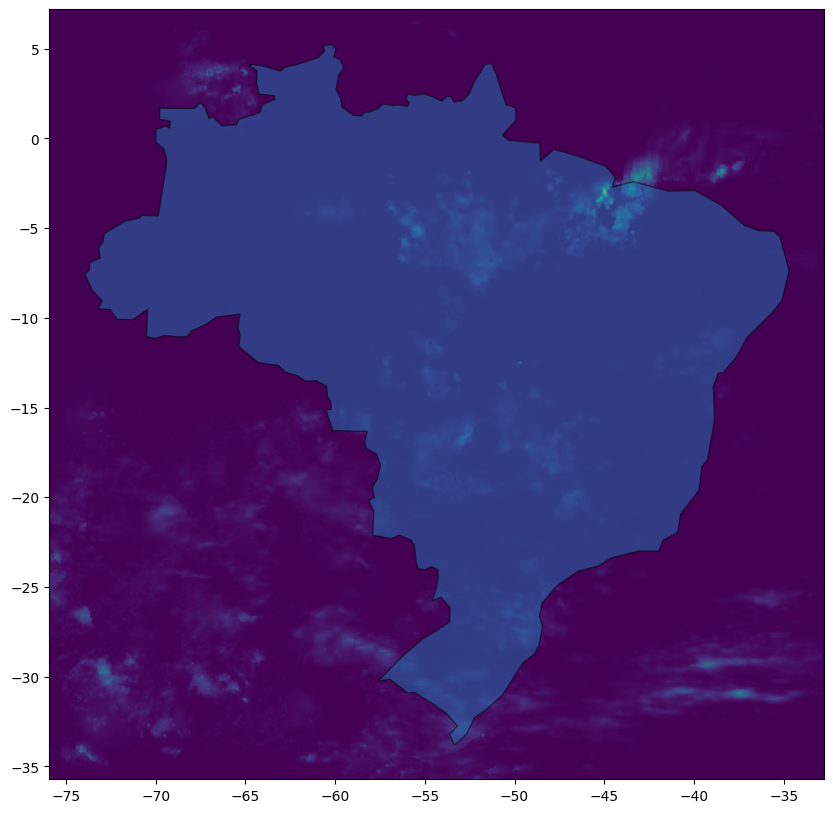

In [224]:
ax = bra.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, source='../tmp/chuva.tif')

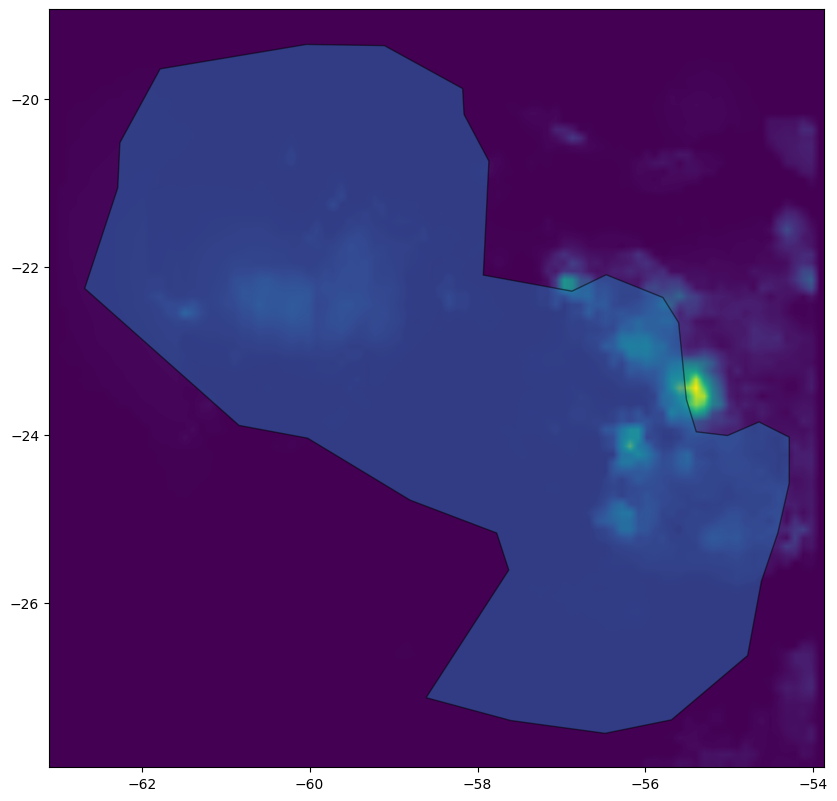

In [229]:
ax = world[world['name'] == 'Paraguay'].plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, source='../tmp/chuva.tif')

In [97]:
rain.info

{'Server': 'Apache',
 'Last-Modified': datetime.datetime(2023, 2, 28, 13, 20, 23),
 'ETag': '"6e0fb-5f5c4f8f8bfc0"',
 'Accept-Ranges': 'bytes',
 'Content-Length': '450811',
 'Access-Control-Allow-Origin': '*',
 'Keep-Alive': 'timeout=5, max=100',
 'Connection': 'Keep-Alive',
 'Request_time': datetime.datetime(2023, 2, 28, 16, 4, 55),
 'model': 'MERGE',
 'provider': 'CPTEC',
 'date': datetime.datetime(2023, 2, 28, 0, 0),
 'ext': 'grib2'}

In [102]:
from raindownloader.http_utils import OSFile
file = NamedOSFile(path, MERGEFile.parse_name)
file.info

{'atime': datetime.datetime(2023, 2, 28, 13, 20, 23),
 'ctime': datetime.datetime(2023, 2, 28, 16, 4, 58, 694353),
 'mtime': datetime.datetime(2023, 2, 28, 13, 20, 23),
 'birthtime': datetime.datetime(2023, 2, 28, 13, 20, 23),
 'size': 450811,
 'model': 'MERGE',
 'provider': 'CPTEC',
 'date': datetime.datetime(2023, 2, 28, 0, 0),
 'ext': 'grib2'}

In [100]:
path.name

'MERGE_CPTEC_20230228.grib2'

In [103]:
import geopandas

In [106]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [109]:
geopandas.datasets.get_path('naturalearth_lowres')

'/Users/cordmaur/miniconda3/envs/geopandas38/lib/python3.8/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp'